# Missing Issue and Imputation

## About this Notebook
In this notebook, the missing issue of `Temp_m` and `Irradience_m` of generators in north cluster is studied. Also, some imputation techniques are proposed to recover these important feature values.

## Import Packages

In [348]:
import os
import warnings

import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

from eda import summarize, plot_univar_dist, plot_bivar, colors

warnings.simplefilter("ignore")
pd.set_option("max_column", None)
sns.set_style("darkgrid")

## Global Function and Variable Definitions

In [349]:
# North or south clusters
CLUST = {
    "N": [498.6, 283.2, 438.3, 499.8],
    "S": [246.4, 492.8, 314.88, 352, 99.84, 99.2, 267.52, 278.4, 343.2, 498.56],
}

## Load Data

In [2]:
train_s = pd.read_csv("./data/processed/0603/train_s.csv")   # Fix from 0602
train_n = pd.read_csv("./data/processed/0603/train_n.csv")   # Fix from 0602

In [3]:
with open("./config/dp.yaml", "r") as f:
    dp_cfg = yaml.full_load(f)

## Weather Data Imputation
The imputation is done by replacing `NaN` with the corresponding values from the neighbor station.

### *South Cluster*
Imputation for `WDGust` and `RHMin` seems not convincing. 

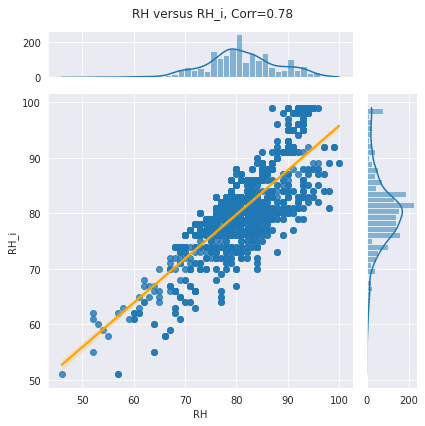

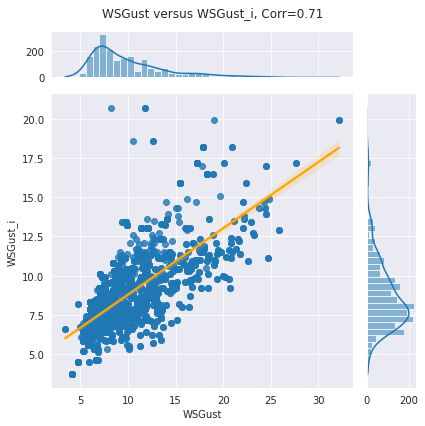

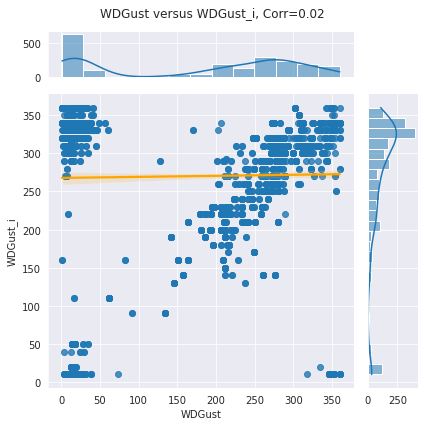

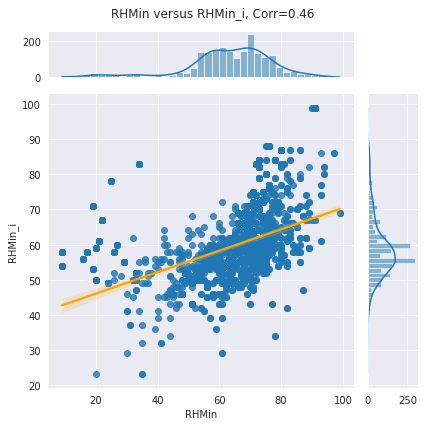

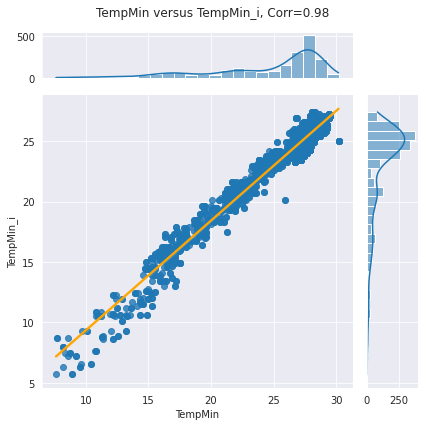

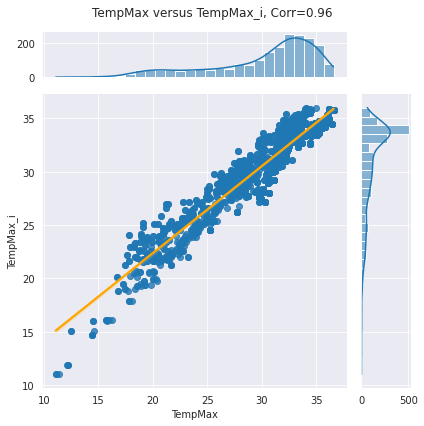

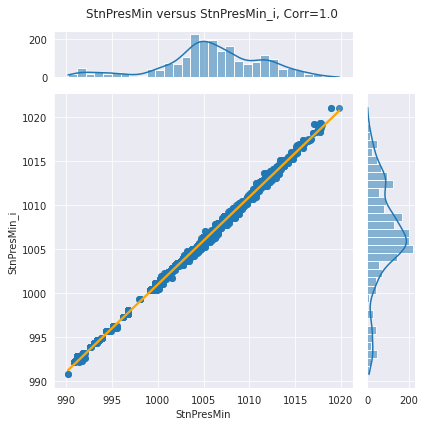

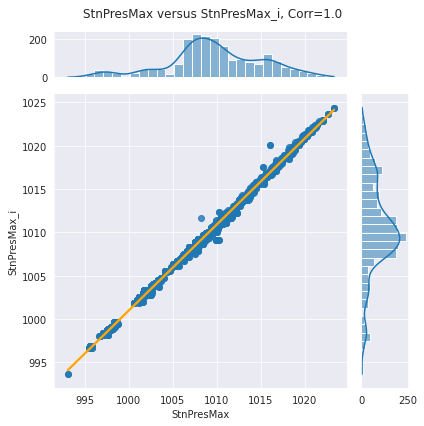

In [4]:
for f in ["RH", "WSGust", "WDGust", "RHMin", 
          "TempMin", "TempMax", "StnPresMin", "StnPresMax"]:
    plot_bivar(train_s, [f, f"{f}_i"])

In [5]:
for f in ["RH", "WSGust", "WDGust", "RHMin", 
          "TempMin", "TempMax", "StnPresMin", "StnPresMax"]:
    f_na_idx = train_s[f].isna()
    train_s.loc[f_na_idx, f] = train_s.loc[f_na_idx, f"{f}_i"]
summarize(train_s, "train_s Imputed", 1)

=====Summary of train_s Imputed=====


,Date,Lat,Lon,Irradiance,Temp,Module,Capacity,Angle,Irradiance_m,Temp_m,Generation,Location,Irradiance_gap,Irradiance_dev,TempSta,IrraSta,StnPres,StnPresMax,StnPresMin,Temp_t,TempMax,TempMin,RH,RHMin,WS,WD,WSGust,WDGust,Precp,StaName,StnPres_i,SeaPres,StnPresMax_i,StnPresMin_i,Temp_i,TempMax_i,TempMin_i,TdDewPoint,RH_i,RHMin_i,WS_i,WD_i,WSGust_i,WDGust_i,Precp_i,PrecpMax10,PrecpMax60,SunShine,Irradiance_i,StaName_i,TempDiff,IrraDiff,clust
0,2020-09-23,24.107,120.44,21.83,27.8,AUO PM060MW3 320W,492.8,4.63,558.6768,47.2,2351,24.107-120.44,536.8468,True,xx,tca,1007.5,1008.6,1006.3,27.8,30.5,24.9,74.0,65.0,3.3,24.0,10.3,11.0,0.0,xx,1008.4,1009.2,1009.4,1007.1,27.2,32.8,23.2,22.1,74.0,57.0,1.8,320.0,7.7,310.0,0.0,0.0,0.0,9.9,21.83,tca,0.0,0.0,S


Shape: (2126, 53)
NaN ratio:


,Irradiance_gap,Date,WS_i,StaName,StnPres_i,SeaPres,StnPresMax_i,StnPresMin_i,Temp_i,TempMax_i,TempMin_i,TdDewPoint,RH_i,RHMin_i,WD_i,WDGust,WSGust_i,WDGust_i,Precp_i,PrecpMax10,PrecpMax60,SunShine,Irradiance_i,StaName_i,TempDiff,IrraDiff,Precp,WSGust,Lat,Irradiance_dev,Lon,Irradiance,Temp,Module,Capacity,Angle,Irradiance_m,Temp_m,Generation,Location,TempSta,WD,IrraSta,StnPres,StnPresMax,StnPresMin,Temp_t,TempMax,TempMin,RH,RHMin,WS,clust
NaN Ratio,0.28222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Zero ratio:


,IrraDiff,TempDiff,Precp,Precp_i,PrecpMax60,PrecpMax10,Angle,Irradiance_dev,RH_i,StnPresMax_i,SeaPres,StnPresMin_i,Temp_i,StnPres_i,TempMax_i,TempMin_i,TdDewPoint,Date,RHMin_i,WS_i,WD_i,WSGust_i,WDGust_i,SunShine,Irradiance_i,StaName_i,StaName,WSGust,WDGust,TempSta,Lon,Irradiance,Temp,Module,Capacity,Irradiance_m,Temp_m,Generation,Location,Irradiance_gap,IrraSta,Lat,StnPres,StnPresMax,StnPresMin,Temp_t,TempMax,TempMin,RH,RHMin,WS,WD,clust
Zero Ratio,100.0,97.554092,77.5635,76.387582,76.058325,76.058325,20.88429,2.210724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### *North Cluster*
Imputation of `RHMin`, `WD`, `WDGust` seems not convincing. What's worse, the missing issue occurs in imputation source column, either. Hence, some missing entries still exist after imputation. After observation, I think impututing those entries with simple statistics when doing data processing is acceptible.

In [26]:
train_n.columns[train_n.isna().any()]

Index(['Temp_m', 'Irradiance_gap', 'StnPres', 'StnPresMax', 'StnPresMin',
       'Temp_t', 'TempMax', 'TempMin', 'RH', 'RHMin', 'WS', 'WD', 'WSGust',
       'WDGust', 'Precp', 'StaName', 'SeaPres', 'Temp_i', 'TempMax_i',
       'TempMin_i', 'TdDewPoint', 'WD_i', 'PrecpMax10', 'PrecpMax60',
       'TempDiff'],
      dtype='object')

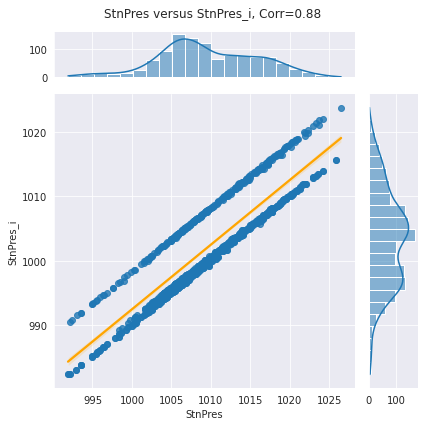

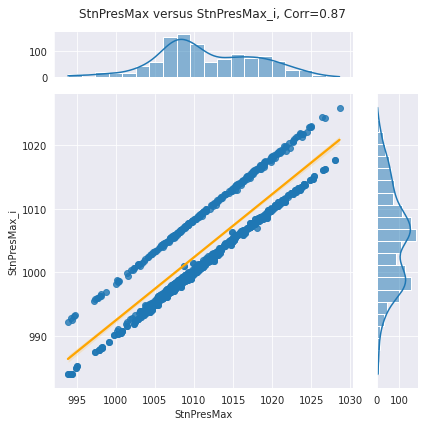

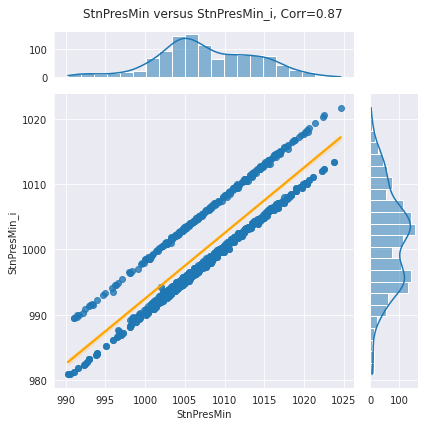

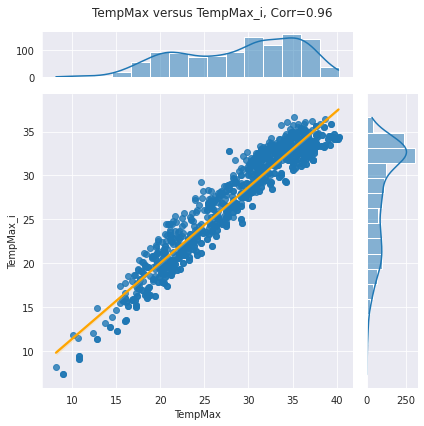

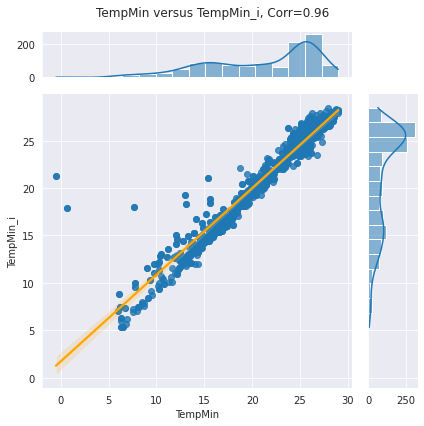

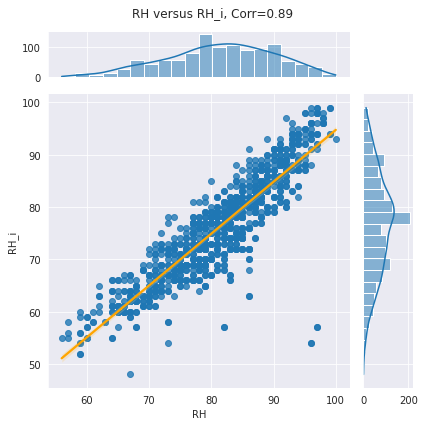

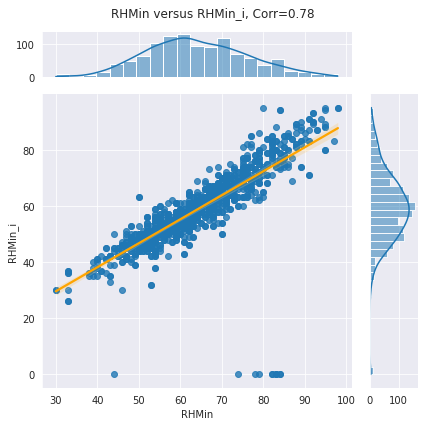

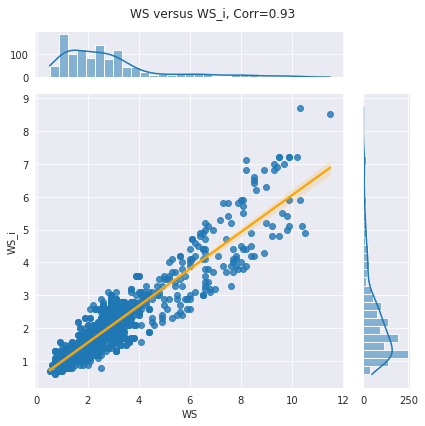

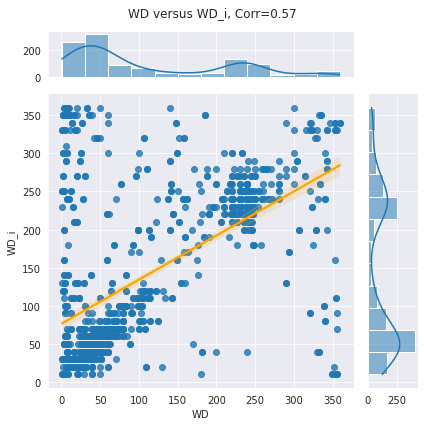

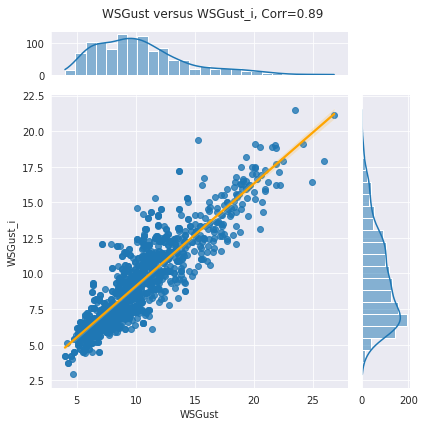

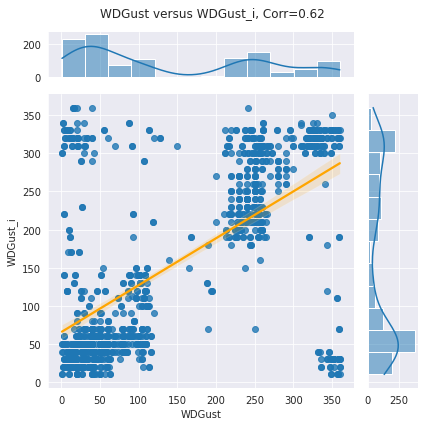

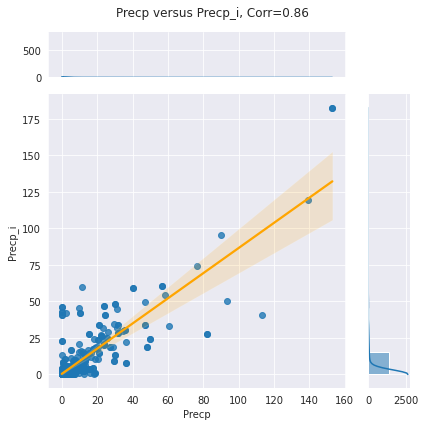

In [9]:
for f in ["StnPres", "StnPresMax", "StnPresMin", 
          "TempMax", "TempMin",
          "RH","RHMin", 
          "WS", "WD", "WSGust", "WDGust",
          "Precp"]:
    plot_bivar(train_n, [f, f"{f}_i"])

In [11]:
for f in ["StnPres", "StnPresMax", "StnPresMin", 
          "TempMax", "TempMin",
          "RH","RHMin", 
          "WS", "WD", "WSGust", "WDGust",
          "Precp"]:
    f_na_idx = train_n[f].isna()
    train_n.loc[f_na_idx, f] = train_n.loc[f_na_idx, f"{f}_i"]
summarize(train_n, "train_n", 1)

=====Summary of train_n=====


,Date,Lat,Lon,Irradiance,Temp,Module,Capacity,Angle,Irradiance_m,Temp_m,Generation,Location,Irradiance_gap,Irradiance_dev,TempSta,IrraSta,StnPres,StnPresMax,StnPresMin,Temp_t,TempMax,TempMin,RH,RHMin,WS,WD,WSGust,WDGust,Precp,StaName,StnPres_i,SeaPres,StnPresMax_i,StnPresMin_i,Temp_i,TempMax_i,TempMin_i,TdDewPoint,RH_i,RHMin_i,WS_i,WD_i,WSGust_i,WDGust_i,Precp_i,PrecpMax10,PrecpMax60,SunShine,Irradiance_i,StaName_i,TempDiff,IrraDiff,clust
0,2020-06-09,25.11,121.26,8.37,26.3,MM60-6RT-300,499.8,22.0,8.37,NaN,630,25.11-121.26,1.776357e-15,False,lz,aic,1006.2,1007.4,1004.7,26.4,29.8,23.6,86.0,70.0,1.0,158.0,5.9,225.0,0.5,lz,997.1,1012.7,998.1,995.8,26.2,29.1,24.0,22.6,81.0,60.0,1.1,170.0,6.8,190.0,2.0,1.0,2.0,9.0,8.37,aic,-0.003788,0.0,N


Shape: (1458, 53)
NaN ratio:


,Temp_m,TempDiff,Temp_t,StaName,Irradiance_gap,Temp_i,TempMax_i,TempMin_i,TdDewPoint,SeaPres,WD_i,PrecpMax60,PrecpMax10,SunShine,StnPres_i,IrraDiff,StnPresMax_i,StnPresMin_i,StaName_i,Irradiance_i,WDGust_i,Precp_i,RH_i,RHMin_i,WS_i,Precp,WSGust_i,Date,WSGust,WDGust,Lat,Lon,Irradiance,Temp,Module,Capacity,Angle,Irradiance_m,Generation,Location,Irradiance_dev,TempSta,IrraSta,StnPres,StnPresMax,StnPresMin,TempMax,TempMin,RH,RHMin,WS,WD,clust
NaN Ratio,100.0,22.633745,22.633745,21.673525,1.234568,0.685871,0.685871,0.685871,0.685871,0.068587,0.068587,0.068587,0.068587,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Zero ratio:


,Irradiance_dev,IrraDiff,Precp_i,PrecpMax10,PrecpMax60,Precp,TempDiff,Irradiance_gap,SunShine,Irradiance_m,RHMin_i,Temp_i,StnPresMin_i,Date,StnPresMax_i,TempMin_i,SeaPres,StnPres_i,TempMax_i,WSGust_i,TdDewPoint,RH_i,WS_i,WD_i,WDGust_i,Irradiance_i,StaName_i,StaName,WSGust,WDGust,Lat,Lon,Irradiance,Temp,Module,Capacity,Angle,Temp_m,Generation,Location,TempSta,IrraSta,StnPres,StnPresMax,StnPresMin,Temp_t,TempMax,TempMin,RH,RHMin,WS,WD,clust
Zero Ratio,100.0,99.862826,75.171468,75.102881,75.102881,73.45679,72.908093,9.396433,2.1262,1.234568,0.754458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
train_s.to_csv("./data/processed/0603/train_s.csv", index=False)
train_n.to_csv("./data/processed/0603/train_n.csv", index=False)

In [22]:
test = pd.read_csv("./data/processed/0525/test.csv")
for f in ["WS", "WD", "WSGust", "WDGust", 
          "RH", "RHMin", 
          "TempMin", "TempMax",
          "StnPres", "StnPresMin", "StnPresMax",
          "Precp"]:
    f_na_idx = test[f].isna()
    test.loc[f_na_idx, f] = test.loc[f_na_idx, f"{f}_i"]
summarize(test, "test", 1)

=====Summary of test=====


,ID,Date,Lat,Lon,Irradiance,Temp,Module,Capacity,Angle,Irradiance_m,Temp_m,Generation,TempSta,IrraSta,StnPres,StnPresMax,StnPresMin,Temp_t,TempMax,TempMin,RH,RHMin,WS,WD,WSGust,WDGust,Precp,StaName,StnPres_i,SeaPres,StnPresMax_i,StnPresMin_i,Temp_i,TempMax_i,TempMin_i,TdDewPoint,RH_i,RHMin_i,WS_i,WD_i,WSGust_i,WDGust_i,Precp_i,PrecpMax10,PrecpMax60,SunShine,Irradiance_i,StaName_i
0,1,2021-10-29,24.98,121.03,18.32,22.0,SEC-6M-60A-295,283.2,-31.0,18.3204,NaN,NaN,tya,tya,1014.9,1016.6,1013.8,NaN,25.9,19.7,70.0,54.0,4.2,50.0,11.9,80.0,0.0,NaN,1014.9,1019.7,1016.6,1013.8,22.0,25.9,19.7,16.4,70.0,54.0,4.2,50.0,11.9,80.0,0.0,0.0,0.0,9.1,18.32,tya


Shape: (1539, 48)
NaN ratio:


,Generation,Temp_m,Temp_t,StaName,RH_i,StnPres_i,SeaPres,StnPresMax_i,StnPresMin_i,Temp_i,TempMax_i,TempMin_i,TdDewPoint,ID,RHMin_i,Precp,WD_i,WSGust_i,WDGust_i,Precp_i,PrecpMax10,PrecpMax60,SunShine,Irradiance_i,WS_i,WSGust,WDGust,Date,Lat,Lon,Irradiance,Temp,Module,Capacity,Angle,Irradiance_m,TempSta,IrraSta,StnPres,StnPresMax,StnPresMin,TempMax,TempMin,RH,RHMin,WS,WD,StaName_i
NaN Ratio,100.0,28.589994,17.673814,7.277453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Zero ratio:


,PrecpMax60,PrecpMax10,Precp_i,Precp,Angle,SunShine,TempMin_i,StaName,StnPres_i,SeaPres,StnPresMax_i,StnPresMin_i,Temp_i,TempMax_i,ID,TdDewPoint,RH_i,WDGust,WS_i,WD_i,WSGust_i,WDGust_i,Irradiance_i,RHMin_i,WSGust,Date,TempSta,Lat,Lon,Irradiance,Temp,Module,Capacity,Irradiance_m,Temp_m,Generation,IrraSta,WD,StnPres,StnPresMax,StnPresMin,Temp_t,TempMax,TempMin,RH,RHMin,WS,StaName_i
Zero Ratio,80.116959,80.116959,80.116959,76.023392,21.57245,0.649773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
test.to_csv("./data/processed/0603/test.csv", index=False)

In [ ]:
train_n["ID"] = -1
train_s["ID"] = -1
complete2 = pd.concat([train_s, train_n, test], join="inner", ignore_index=True)
complete2.to_csv("./data/processed/0603/complete.csv", index=False)

## `Temp_m` and `Irradiance_m` Imputation 
These two important features are missing for all generators in North cluster; hence, imputation aming at recovering them is implemented.

<div class="alert alert-danger">
    Quality of imputation can be improved.
</div>

In [31]:
complete = pd.read_csv("./data/processed/0603/complete.csv")

In [32]:
TARGET1, TARGET2 = "Temp_m", "Irradiance_m"
FEAT = dp_cfg["feats"]

In [35]:
cap_enc = LabelEncoder()
cap_enc.fit(complete["Capacity"])

LabelEncoder()

### *Task1 - `Temp_m`*

#### Optional Label Encoding

In [33]:
# # 
# angle_enc = LabelEncoder()
# angle_enc.fit(complete["Angle"])

# #
# wd_enc = LabelEncoder()
# wd_enc.fit(complete["WD"])

# #
# wdgust_enc = LabelEncoder()
# wdgust_enc.fit(complete["WDGust"])

In [36]:
train_s["CapCode"] = cap_enc.transform(train_s["Capacity"])
X, y = train_s[FEAT], train_s[TARGET1]
print(f"Shape of X: {X.shape}, shape of y: {y.shape}")

Shape of X: (2126, 20), shape of y: (2126,)


In [37]:
model_params = {
    "loss": "squared_error",
    "learning_rate": 0.01,
    "max_iter": 2500,
    "l2_regularization": 1,
#     "categorical_features": [],
    "early_stopping": True,
    "validation_fraction": 0.2,
    "n_iter_no_change": 200,
    "random_state": 16888,
    "verbose": 1
}

In [38]:
models = []
prfs = {"rmse": [], "mae": []}
oof = np.zeros(len(y))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=168)
for tr_idx, val_idx in cv.split(X, train_s["CapCode"], None):
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
    
    model = HistGradientBoostingRegressor(**model_params)
    model.fit(X_tr, y_tr)
    models.append(model)
    
    y_val_pred = model.predict(X_val)
    oof[val_idx] = y_val_pred
    
    prfs["rmse"].append(np.sqrt(mse(y_val, y_val_pred)))
    prfs["mae"].append(mae(y_val, y_val_pred))

1 tree, 31 leaves, max depth = 8, train loss: 35.15451, val loss: 38.20363, in 0.016s
[42/2500] 1 tree, 31 leaves, max depth = 9, train loss: 34.74538, val loss: 37.81345, in 0.037s
[43/2500] 1 tree, 31 leaves, max depth = 9, train loss: 34.34388, val loss: 37.42657, in 0.019s
[44/2500] 1 tree, 31 leaves, max depth = 8, train loss: 33.95208, val loss: 37.04475, in 0.038s
[45/2500] 1 tree, 31 leaves, max depth = 8, train loss: 33.56806, val loss: 36.67336, in 0.047s
[46/2500] 1 tree, 31 leaves, max depth = 9, train loss: 33.18839, val loss: 36.30353, in 0.060s
[47/2500] 1 tree, 31 leaves, max depth = 8, train loss: 32.81814, val loss: 35.94297, in 0.045s
[48/2500] 1 tree, 31 leaves, max depth = 9, train loss: 32.45286, val loss: 35.59361, in 0.004s
[49/2500] 1 tree, 31 leaves, max depth = 8, train loss: 32.09317, val loss: 35.25338, in 0.004s
[50/2500] 1 tree, 31 leaves, max depth = 8, train loss: 31.73644, val loss: 34.91109, in 0.044s
[51/2500] 1 tree, 31 leaves, max depth = 8, train 

In [41]:
train_s[f"{TARGET1}_pred"] = oof
print(f"RMSE avg {np.mean(prfs['rmse']):.2f}, std {np.std(prfs['rmse']):.2f}")
print(f"MAE avg {np.mean(prfs['mae']):.2f}, std {np.std(prfs['mae']):.2f}")

RMSE avg 4.86, std 0.08
MAE avg 3.41, std 0.09


#### Prediction Visualization

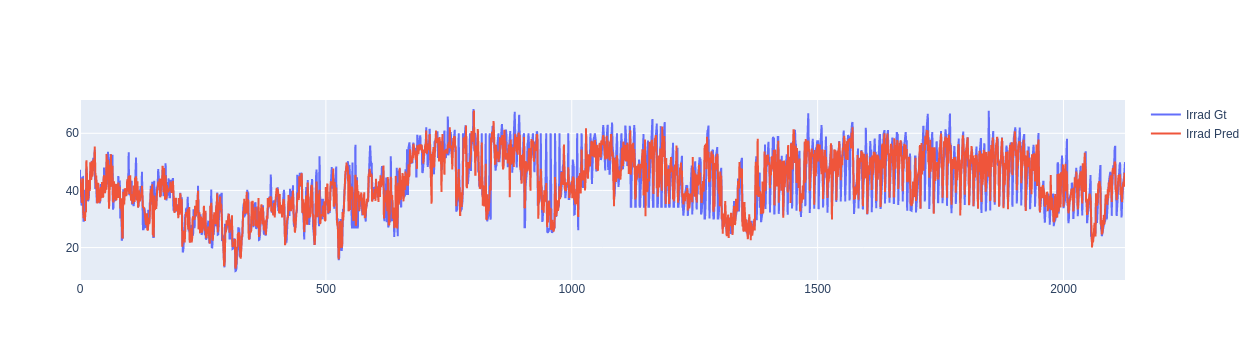

In [42]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_s.index, y=train_s["Temp_m"], mode="lines", name="Irrad Gt"))
fig.add_trace(go.Scatter(x=train_s.index, y=train_s["Temp_m_pred"], mode="lines", name="Irrad Pred"))
fig.show()

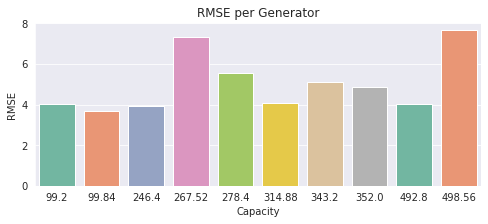

In [52]:
rmse = lambda x: np.sqrt(np.mean(np.square(x["Temp_m"] - x["Temp_m_pred"])))
gt_pred = train_s[["Capacity", "Temp_m", "Temp_m_pred"]]
rmse_cap = gt_pred.groupby("Capacity").apply(rmse)

fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(x=rmse_cap.index, y=rmse_cap.values, palette=colors, ax=ax)
ax.set_title(f"RMSE per Generator")
ax.set_xlabel(f"Capacity")
ax.set_ylabel("RMSE")
fig.show()

### *Task2 - `Irradiance_m`*

In [53]:
y = train_s[TARGET2]
print(f"Shape of X: {X.shape}, shape of y: {y.shape}")

Shape of X: (2126, 20), shape of y: (2126,)


In [54]:
models2 = []
prfs2 = {"rmse": [], "mae": []}
oof = np.zeros(len(y))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=168)
for tr_idx, val_idx in cv.split(X, train_s["CapCode"], None):
    X_tr, X_val = X.iloc[tr_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[tr_idx], y.iloc[val_idx]
    
    model = HistGradientBoostingRegressor(**model_params)
    model.fit(X_tr, y_tr)
    models2.append(model)
    
    y_val_pred = model.predict(X_val)
    oof[val_idx] = y_val_pred
    
    prfs2["rmse"].append(np.sqrt(mse(y_val, y_val_pred)))
    prfs2["mae"].append(mae(y_val, y_val_pred))

Binning 0.000 GB of training data: 0.103 s
Binning 0.000 GB of validation data: 0.012 s
Fitting gradient boosted rounds:
[1/2500] 1 tree, 31 leaves, max depth = 8, train loss: 166573.61102, val loss: 181939.13067, in 0.028s
[2/2500] 1 tree, 31 leaves, max depth = 8, train loss: 164017.67442, val loss: 179451.86647, in 0.007s
[3/2500] 1 tree, 31 leaves, max depth = 8, train loss: 161511.27913, val loss: 177015.13265, in 0.034s
[4/2500] 1 tree, 31 leaves, max depth = 8, train loss: 159053.46479, val loss: 174627.92806, in 0.046s
[5/2500] 1 tree, 31 leaves, max depth = 8, train loss: 156643.28963, val loss: 172289.27116, in 0.031s
[6/2500] 1 tree, 31 leaves, max depth = 8, train loss: 154274.20723, val loss: 169984.89148, in 0.033s
[7/2500] 1 tree, 31 leaves, max depth = 9, train loss: 151960.14361, val loss: 167679.30215, in 0.034s
[8/2500] 1 tree, 31 leaves, max depth = 9, train loss: 149690.25851, val loss: 165427.53111, in 0.033s
[9/2500] 1 tree, 31 leaves, max depth = 8, train loss: 

In [55]:
train_s[f"{TARGET2}_pred"] = oof
print(f"RMSE avg {np.mean(prfs2['rmse']):.2f}, std {np.std(prfs2['rmse']):.2f}")
print(f"MAE avg {np.mean(prfs2['mae']):.2f}, std {np.std(prfs2['mae']):.2f}")

RMSE avg 269.50, std 25.30
MAE avg 157.48, std 10.68


#### Prediction Visualization

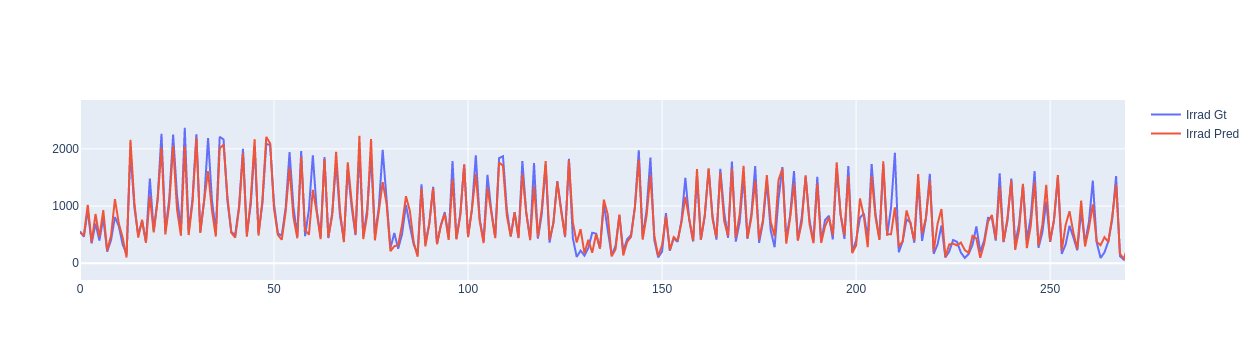

In [57]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=train_s.index, y=train_s["Irradiance_m"], mode="lines", name="Irrad Gt"))
fig.add_trace(go.Scatter(x=train_s.index, y=train_s["Irradiance_m_pred"], mode="lines", name="Irrad Pred"))
fig.show()

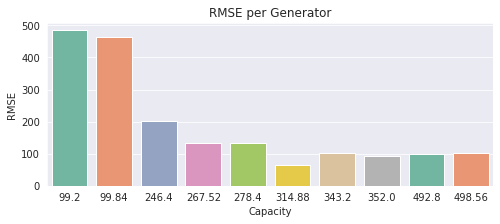

In [59]:
rmse = lambda x: np.sqrt(np.mean(np.square(x[TARGET2] - x[f"{TARGET2}_pred"])))
gt_pred = train_s[["Capacity", TARGET2, f"{TARGET2}_pred"]]
rmse_cap = gt_pred.groupby("Capacity").apply(rmse)

fig, ax = plt.subplots(figsize=(8, 3))
sns.barplot(x=rmse_cap.index, y=rmse_cap.values, palette=colors, ax=ax)
ax.set_title(f"RMSE per Generator")
ax.set_xlabel(f"Capacity")
ax.set_ylabel("RMSE")
fig.show()

### *Start Imputation*
Impute missing `Irradiance_m` and `Temp_m` for generators 3 in North cluster.

In [61]:
X_test = train_n[FEAT]  
y1_test_pred = np.zeros(len(X_test))

for model in models:
    y1_test_pred += model.predict(X_test) / 5
train_n["Temp_m"] = y1_test_pred

array([35.58964549, 48.28018262, 38.05290376, ..., 41.25376397,
       37.42066137, 35.55450655])

In [62]:
y2_test_pred = np.zeros(len(X_test))

for model in models2:
    y2_test_pred += model.predict(X_test) / 5
train_n["Irradiance_m"] = y2_test_pred

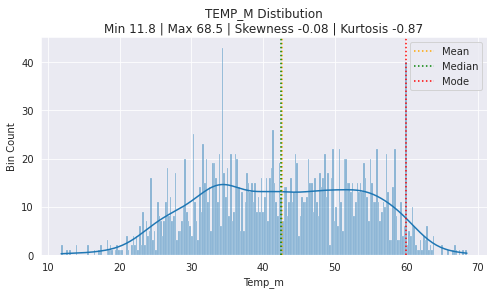

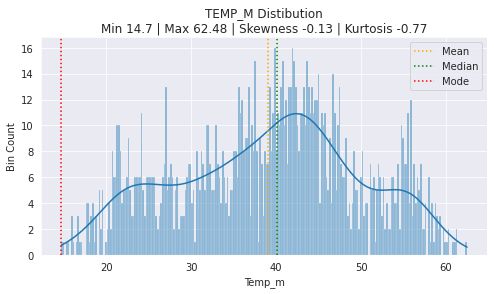

In [70]:
for df in [train_s, train_n]:
    plot_univar_dist(df[TARGET1], TARGET1)

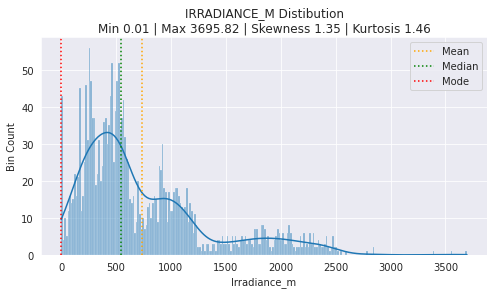

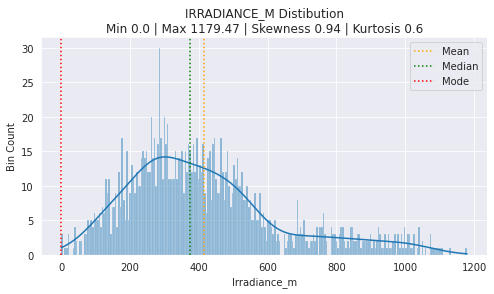

In [72]:
train_n["Irradiance_m"].clip(lower=0, inplace=True)   # Negative values are unreasonable
for df in [train_s, train_n]:
    plot_univar_dist(df[TARGET2], TARGET2)

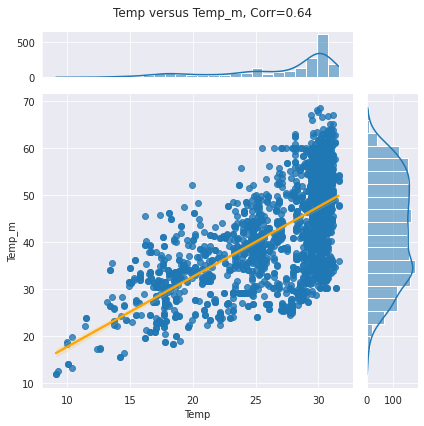

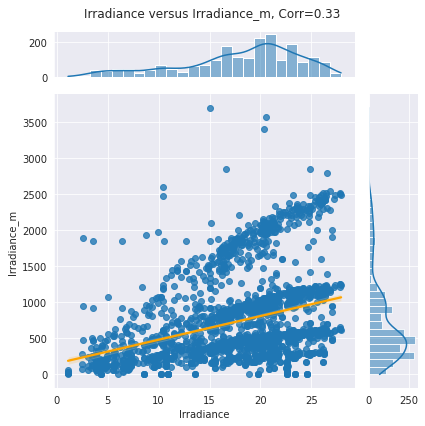

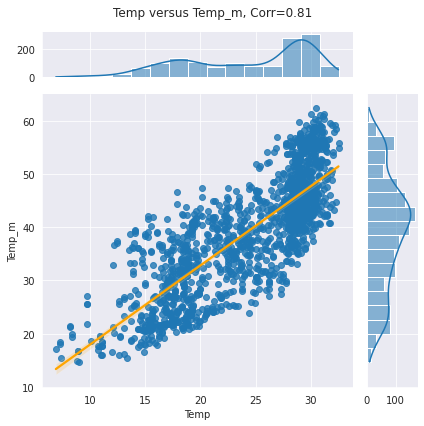

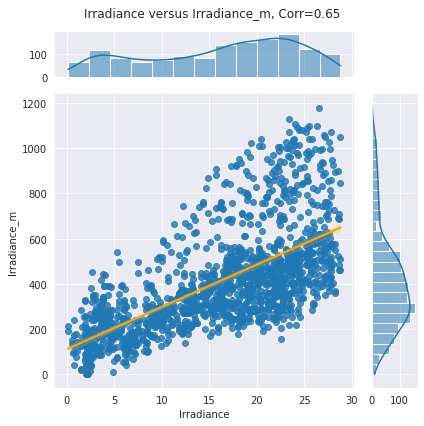

In [73]:
for df in [train_s, train_n]:
    plot_bivar(df, ["Temp", TARGET1])
    plot_bivar(df, ["Irradiance", TARGET2])

In [74]:
train_n.to_csv("./data/processed/0603/train_n_imputed.csv", index=False)

In [75]:
train_n.columns[train_n.isna().any()]

Index(['Irradiance_gap', 'Temp_t', 'StaName', 'SeaPres', 'Temp_i', 'TempMax_i',
       'TempMin_i', 'TdDewPoint', 'WD_i', 'PrecpMax10', 'PrecpMax60',
       'TempDiff'],
      dtype='object')

In [88]:
train = pd.concat([train_n, train_s[train_n.columns]], ignore_index=True)
train.shape

(3584, 53)

In [90]:
train.to_csv("./data/processed/0603/train.csv", index=False)

Next, the missing entries in testing data are also needed to impute.

In [ ]:
test = pd.read_csv("./data/processed/0603/test.csv")

In [96]:
y1_test_pred = np.zeros(len(test))   # Temp_m

for model in models:
    y1_test_pred += model.predict(test[FEAT]) / 5
test["Temp_m_pred"] = y1_test_pred

array([37.93415532, 36.08507522, 35.30933929, ..., 21.68640559,
       21.48682107, 20.58268787])

In [97]:
y2_test_pred = np.zeros(len(test))   # Irrad_m

for model in models2:
    y2_test_pred += model.predict(test[FEAT]) / 5
test["Irradiance_m_pred"] = y2_test_pred

array([1001.67411782,  289.51455061,  306.08651634, ...,  123.25000352,
        231.32143038,   83.94454342])

In [102]:
np.sqrt(np.mean(np.square(test["Temp_m"]-test["Temp_m_pred"])))
np.mean(np.abs(test["Temp_m"]-test["Temp_m_pred"]))
np.sqrt(np.mean(np.square(test["Irradiance_m"]-test["Irradiance_m_pred"])))
np.mean(np.abs(test["Irradiance_m"]-test["Irradiance_m_pred"]))

4.944056997633868

In [106]:
test.loc[test["Temp_m"].isna(), "Temp_m"] = test.loc[test["Temp_m"].isna(), "Temp_m_pred"]
test.loc[test["Capacity"].isin(CLUST["N"]), "Irradiance_m"] = test.loc[test["Capacity"].isin(CLUST["N"]), "Irradiance_m_pred"]
test.to_csv("./data/processed/0603/test_imputed.csv", index=False)